# Rohit Thakare
# PGA 45

## Objective and Synopsis
### The primary objective of this project is to develop an accurate and robust deep learning model that can predict the future stock prices of Mastercard Incorporated based on historical stock data. The model will assist investors, traders, and financial analysts in making informed decisions regarding buying, selling, or holding Mastercard stocks.

## Dimensions we will explore -
### Specifically, the project aims to address the following key questions:
    1. Can we accurately predict the future stock prices of Mastercard using deep learning techniques?
    2. How does the performance of the deep learning model compare to traditional forecasting methods?
    3. What are the most influential factors driving the stock prices of Mastercard, and how effectively does the model capture them?
    4. How can the developed model be deployed and integrated into existing trading systems or investment platforms


### In this project, we aim to develop a deep learning model to predict the stock prices of Mastercard Incorporated (NYSE: MA) based on historical stock data. Mastercard is a leading global payments and technology company, and its stock prices are influenced by various factors including market trends, company performance, and macroeconomic indicators.

# Simple RNN

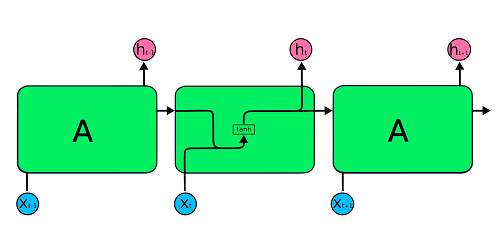

# LSTM Model (Long Short Term Memory)

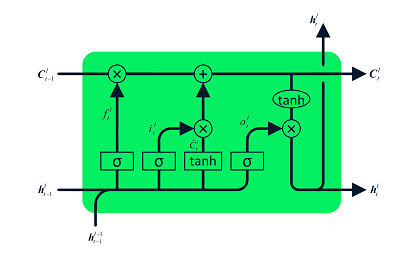

# GRU Model (Gated Recurrent Unit)

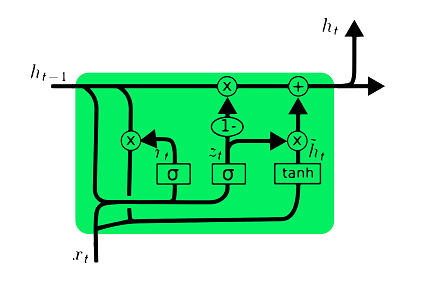

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed

set_seed(455)
np.random.seed(455)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv (r"C:\Users\nages\Downloads\Mastercard_stock_history.csv", index_col="Date", parse_dates=["Date"])
print(df.head())

                Open      High       Low     Close     Volume  Dividends  \
Date                                                                       
2006-05-25  3.748967  4.283869  3.739664  4.279217  395343000        0.0   
2006-05-26  4.307126  4.348058  4.103398  4.179680  103044000        0.0   
2006-05-30  4.183400  4.184330  3.986184  4.093164   49898000        0.0   
2006-05-31  4.125723  4.219679  4.125723  4.180608   30002000        0.0   
2006-06-01  4.179678  4.474572  4.176887  4.419686   62344000        0.0   

            Stock Splits  
Date                      
2006-05-25           0.0  
2006-05-26           0.0  
2006-05-30           0.0  
2006-05-31           0.0  
2006-06-01           0.0  


# PreProcessing and Visualisation

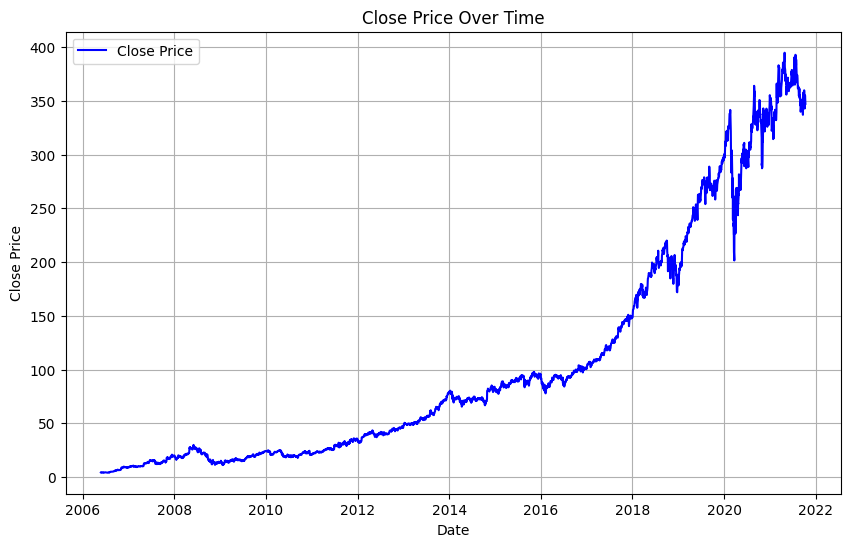

In [3]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Assuming 'Date' is the first level of the index

# Plotting the 'Close' column
plt.figure(figsize=(10, 6))
plt.plot(df.index.get_level_values(0), df['Close'], color='blue', label='Close Price')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


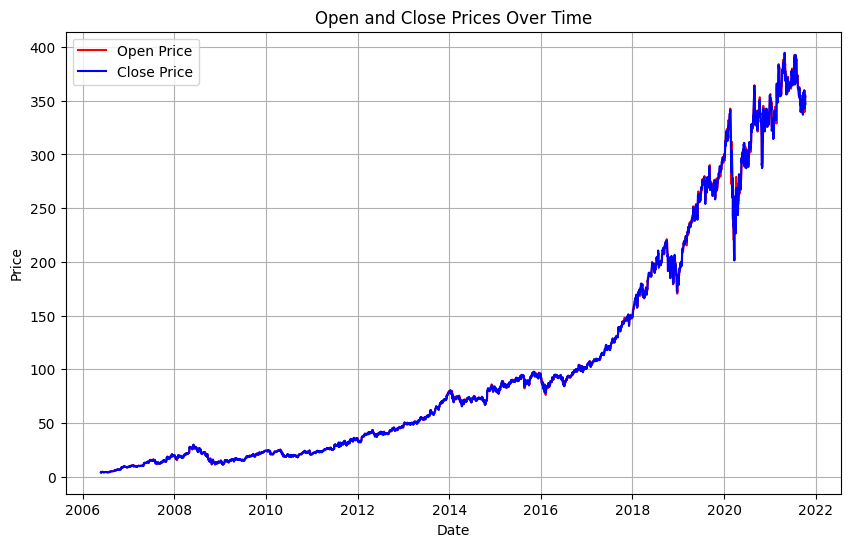

In [5]:
import matplotlib.pyplot as plt

# Plotting 'Open' and 'Close' prices
plt.figure(figsize=(10, 6))
plt.plot(df.index.get_level_values(0), df['Open'], color='red', label='Open Price')
plt.plot(df.index.get_level_values(0), df['Close'], color='blue', label='Close Price')
plt.title('Open and Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


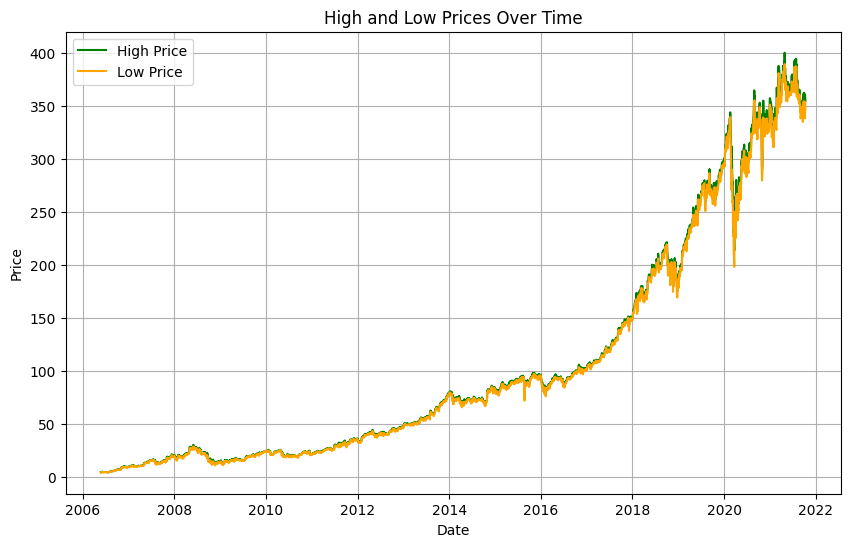

In [6]:
import matplotlib.pyplot as plt

# Plotting 'High' and 'Low' prices
plt.figure(figsize=(10, 6))
plt.plot(df.index.get_level_values(0), df['High'], color='green', label='High Price')
plt.plot(df.index.get_level_values(0), df['Low'], color='orange', label='Low Price')
plt.title('High and Low Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


## Data Cleaning and Transformation

In [3]:
df = df.drop(["Dividends","Stock Splits"], axis=1)
print(df.head())

                Open      High       Low     Close     Volume
Date                                                         
2006-05-25  3.748967  4.283869  3.739664  4.279217  395343000
2006-05-26  4.307126  4.348058  4.103398  4.179680  103044000
2006-05-30  4.183400  4.184330  3.986184  4.093164   49898000
2006-05-31  4.125723  4.219679  4.125723  4.180608   30002000
2006-06-01  4.179678  4.474572  4.176887  4.419686   62344000


In [4]:
print(df.describe())

              Open         High          Low        Close        Volume
count  3872.000000  3872.000000  3872.000000  3872.000000  3.872000e+03
mean    104.896814   105.956054   103.769349   104.882714  1.232250e+07
std     106.245511   107.303589   105.050064   106.168693  1.759665e+07
min       3.748967     4.102467     3.739664     4.083861  6.411000e+05
25%      22.347203    22.637997    22.034458    22.300391  3.529475e+06
50%      70.810079    71.375896    70.224002    70.856083  5.891750e+06
75%     147.688448   148.645373   146.822013   147.688438  1.319775e+07
max     392.653890   400.521479   389.747812   394.685730  3.953430e+08


In [5]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## Model Building


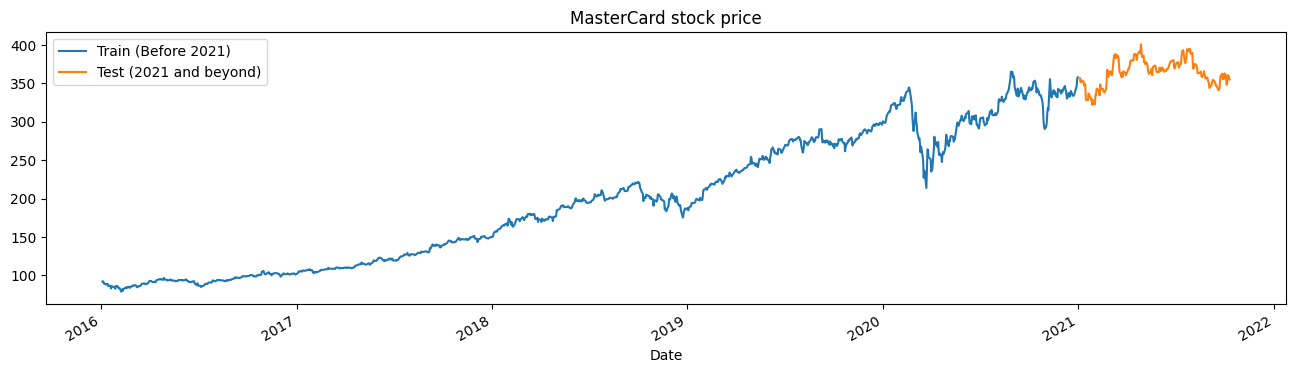

In [6]:
tstart = 2016
tend = 2020

def train_test_plot(df, tstart, tend):
    df.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(16, 4), legend=True)
    df.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("MasterCard stock price")
    plt.show()

train_test_plot(df,tstart,tend)

In [7]:
def train_test_split(df, tstart, tend):
    train = df.loc[f"{tstart}":f"{tend}", "High"].values
    test = df.loc[f"{tend+1}":, "High"].values
    return train, test
training_set, test_set = train_test_split(df, tstart, tend)

In [8]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)

In [9]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


n_steps = 60
features = 1
# split into samples
X_train, y_train = split_sequence(training_set_scaled, n_steps)

In [10]:
# Reshaping X_train for model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],features)

In [11]:
# The LSTM architecture
model_lstm = Sequential()
model_lstm.add(LSTM(units=125, activation="tanh", input_shape=(n_steps, features)))
model_lstm.add(Dense(units=1))
# Compiling the model
model_lstm.compile(optimizer="RMSprop", loss="mse")

model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 125)            │        63,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           126 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,626 (248.54 KB)

 Trainable params: 63,626 (248.54 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0367
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0029
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0017
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0012
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0011
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 9.6849e-04
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 8.4595e-04
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 7.7554e-04
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 7.3997e-04
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 8.0172e-04
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 7.3152e-04
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 6.9654e-04
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 6.5477e-04
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 6.1983e-04
Epoch 15/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms

In [13]:
df_total = df.loc[:,"High"]
inputs = df_total[len(df_total) - len(test_set) - n_steps :].values
inputs = inputs.reshape(-1, 1)
#scaling
inputs = sc.transform(inputs)

# Split into samples
X_test, y_test = split_sequence(inputs, n_steps)
# reshape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)
#prediction
predicted_stock_price = model_lstm.predict(X_test)
#inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


## Evaluation of the Model

In [15]:
def plot_predictions(test, predicted):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title("MasterCard Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("MasterCard Stock Price")
    plt.legend()
    plt.show()

def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))

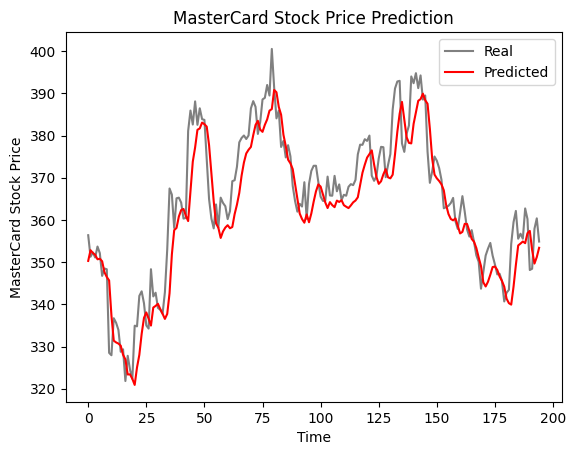

In [17]:
plot_predictions(test_set,predicted_stock_price)

In [22]:
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 7.05.


# GRU Model (Gated Recurrent Unit)

In [18]:
model_gru = Sequential()
model_gru.add(GRU(units=125, activation="tanh", input_shape=(n_steps, features)))
model_gru.add(Dense(units=1))
# Compiling the RNN
model_gru.compile(optimizer="RMSprop", loss="mse")

model_gru.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 125)            │        48,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           126 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,126 (187.99 KB)

 Trainable params: 48,126 (187.99 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model_gru.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0135
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0016
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 8.9826e-04
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 8.6895e-04
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 8.3736e-04
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 7.8367e-04
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 6.1035e-04
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 7.0575e-04
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 6.4276e-04
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 6.0549e-04


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


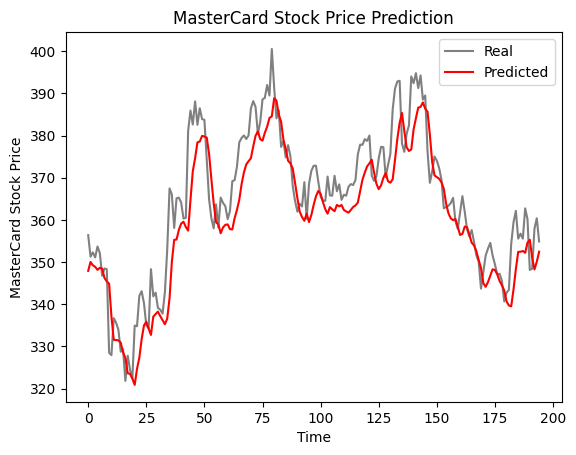

In [20]:
GRU_predicted_stock_price = model_gru.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)
plot_predictions(test_set, GRU_predicted_stock_price)

In [21]:
return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 7.71.


## With an RMSE of 7.71 for the GRU model and 7.05 for the LSTM model, our deep learning models are showing promising performance in predicting the future stock prices of Mastercard Incorporated based on historical data. Here are some business insights derived from these results:

    1) Improved Decision Making: The developed LSTM and GRU models can provide investors, traders, and financial analysts with more accurate predictions of Mastercard's stock prices. This improved forecasting capability enables stakeholders to make more informed decisions regarding buying, selling, or holding Mastercard stocks. By leveraging these models, investors can potentially optimize their investment strategies and maximize returns.

    2) Risk Mitigation: The lower RMSE obtained with the LSTM model suggests that it outperforms the GRU model in terms of prediction accuracy. This insight can guide stakeholders in choosing the most effective model for stock price forecasting. By utilizing the LSTM model, investors can mitigate risks associated with inaccurate predictions and make more reliable investment decisions.

    3) Identifying Trends: The deep learning models not only provide predictions of future stock prices but also capture underlying trends and patterns in Mastercard's stock data. By analyzing the model's predictions and insights, stakeholders can gain a deeper understanding of the market dynamics and identify emerging trends or anomalies that may impact stock prices. This knowledge can be leveraged to anticipate market movements and adjust investment strategies accordingly.
    
    4) Evaluation of Model Performance: The comparison between the LSTM and GRU models highlights the importance of selecting the appropriate architecture for deep learning models in stock price prediction tasks. The superior performance of the LSTM model suggests that it may be better suited for capturing long-term dependencies and complex patterns in the data. This insight informs future model development efforts and underscores the significance of model architecture selection in achieving accurate predictions.

    5) Continuous Improvement: While achieving an RMSE of 7.05 with the LSTM model represents a significant milestone, there is always room for improvement. Continuously refining and optimizing the deep learning models can further enhance their predictive accuracy and reliability. Stakeholders should actively monitor model performance, incorporate new data and features, and explore advanced modeling techniques to stay ahead in the dynamic stock market environment.    
    
## Overall, the successful development and deployment of LSTM and GRU models for stock price prediction provide valuable tools for investors, traders, and financial analysts to navigate the complexities of the financial markets and make informed decisions that align with their investment objectives and risk tolerance.